In [42]:
import numpy as np
import pandas as pd
import warnings
# import optuna
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
dataset = pd.read_excel("Reaction_training_data_167.xlsx")
print(dataset.shape)
store_optimize_data = []
dataset.head()

(167, 7)


,Solute,Solute_V,Solvent,Solvent_V,Aldehyde,Aldehyde_V,Reaction
0,a-m-BzOH,150,chloroform,48.0,benzophenone,2.0,1.646
1,BzOH,180,chloroform,18.0,benzophenone,2.0,1.614
2,a-m-BzOH,150,butanone,48.0,xanthone,2.0,1.597
3,a-m-BzOH,150,butanone,48.0,benzophenone,2.0,1.557
4,a-m-BzOH,150,butanone,48.0,acetophenone,2.0,1.477


In [43]:
# Find missing values
missing_values = dataset.isnull().sum()

# Display the DataFrame of missing values
print(missing_values)

Solute        0
Solute_V      0
Solvent       0
Solvent_V     0
Aldehyde      0
Aldehyde_V    0
Reaction      0
dtype: int64


In [44]:
dataset.describe()

,Solute_V,Solvent_V,Aldehyde_V,Reaction
count,167.000000,167.000000,167.000000,167.000000
mean,137.544910,56.217006,6.238084,0.755313
std,30.566283,32.464548,14.332904,0.349235
min,20.000000,0.000000,0.000000,0.090000
25%,140.000000,48.000000,0.000000,0.478180
50%,140.000000,60.000000,0.200000,0.736000
75%,140.000000,60.000000,2.000000,1.000715
max,200.000000,180.000000,60.000000,1.646000


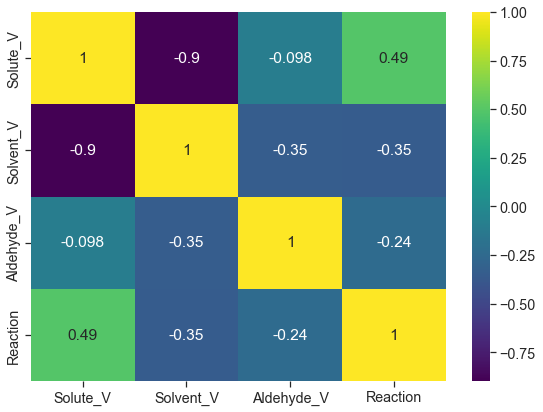

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='viridis',cbar=True)
# plt.title('Comparison of MPC vs RLC Actions - Values within Tolerance Count')
# plt.xlabel('RLC Parameters')
# plt.ylabel('MPC Parameters')
plt.savefig("heatmap_165.png", dpi=600, bbox_inches='tight')
plt.show()

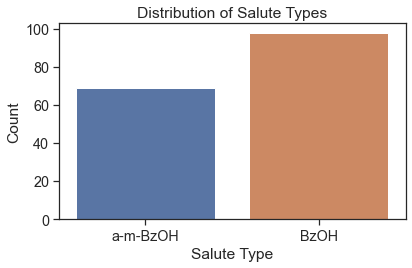

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df' and the categorical variable is 'salute_type'
sns.countplot(data=dataset, x='Solute')

# Optional: Add labels and title to the plot
plt.xlabel('Salute Type')
plt.ylabel('Count')
plt.title('Distribution of Salute Types')

# Show the plot
plt.show()

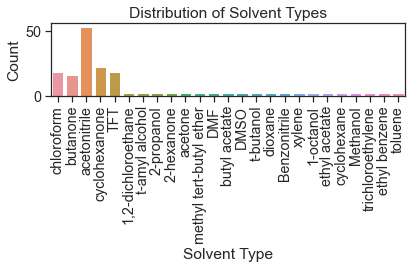

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df' and the categorical variable is 'salute_type'
sns.countplot(data=dataset, x='Solvent')
plt.xticks(rotation=90)
# Optional: Add labels and title to the plot
plt.xlabel('Solvent Type')
plt.ylabel('Count')
plt.title('Distribution of Solvent Types')

# Show the plot
plt.show()

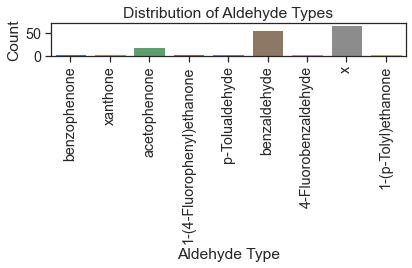

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df' and the categorical variable is 'salute_type'
sns.countplot(data=dataset, x='Aldehyde')
plt.xticks(rotation=90)
# Optional: Add labels and title to the plot
plt.xlabel('Aldehyde Type')
plt.ylabel('Count')
plt.title('Distribution of Aldehyde Types')

# Show the plot
plt.show()

In [49]:
dataset.columns.to_list()

['Solute',
 'Solute_V',
 'Solvent',
 'Solvent_V',
 'Aldehyde',
 'Aldehyde_V',
 'Reaction']

In [50]:
X = dataset[['Solute',
 'Solute_V',
 'Solvent',
 'Solvent_V',
 'Aldehyde',
 'Aldehyde_V','Reaction']].values

# Apply oneHotEncoder Transform

In [51]:
from sklearn.preprocessing import OneHotEncoder
# Preprocess categorical features using OneHotEncoder
categorical_features = [0, 2, 4]  # Specify the indices of categorical columns
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = onehot_encoder.fit_transform(X[:, categorical_features])

# Concatenate the encoded categorical features with the numerical features
numerical_features = [1, 3, 5,6]  # Specify the indices of numerical columns
X_processed = np.concatenate((X_encoded, X[:, numerical_features]),axis=1)

In [52]:
print(X_processed.shape)

(167, 40)


In [53]:
import random
import numpy as np

def manual_data_split(data, train_ratio, test_ratio):
    seed = 42
    random.seed(seed)
    np.random.seed(seed)
    random.shuffle(data)
    
    # Separate input and output variables
    inputs = [row[:-1] for row in data]
    outputs = [row[-1] for row in data]
    
    # Calculate sizes based on ratios
    total_size = len(data)
    train_size = int(total_size * train_ratio)
    test_size = total_size - train_size 
    
    # Randomly select indices for train and test sets
    indices = list(range(total_size))
    random.shuffle(indices)
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]
    
    # Assign data points to sets based on the selected indices
    train_inputs = [inputs[i] for i in train_indices]
    train_outputs = [outputs[i] for i in train_indices]
    test_inputs = [inputs[i] for i in test_indices]
    test_outputs = [outputs[i] for i in test_indices]
    
    return np.array(train_inputs), np.array(train_outputs), np.array(test_inputs), np.array(test_outputs)

X_train, y_train, X_test, y_test = manual_data_split(X_processed, 0.75, 0.25)


In [54]:
print(X_test.shape)
print(X_test)

(42, 39)
[[0.0 1.0 0.0 ... 150 48.0 2.0]
 [0.0 1.0 0.0 ... 150 48.0 2.0]
 [1.0 0.0 0.0 ... 100 98.0 2.0]
 ...
 [0.0 1.0 0.0 ... 140 60.0 0.0]
 [0.0 1.0 0.0 ... 140 20.0 40.0]
 [0.0 1.0 0.0 ... 150 48.0 2.0]]


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
def fun3bar(X):
    A = int(np.round(X[0]))
    B = int(np.round(X[1]))
    C = int(np.round(X[2]))
    D = int(np.round(X[3]))
    E = int(np.round(X[4]))
   
    RF_md = RandomForestRegressor(n_estimators = A,min_samples_split = B,min_samples_leaf = C,
                                                    max_features = D,
                                                max_depth = E,bootstrap = True, random_state= 313)
    
#     RF_md = DecisionTreeRegressor(max_depth = A, min_samples_split = B, min_samples_leaf = C,random_state=42)
    
    RF_md.fit(X_train,y_train)
    train_pred = RF_md.predict(X_train)
    train_mse = mean_squared_error(y_train,train_pred)
    train_RMSE = np.sqrt(train_mse)
    train_R2 = r2_score(y_train,train_pred)
    print("Train R2 :", train_R2)
    return train_RMSE

# Optimization Algorithm

In [ ]:
import warnings
warnings.filterwarnings("ignore")
lb = [2,2,1,1,5]
ub = [1000,500,500,39,1000] 
pos = list()
N = 20 # Population size
D = 5   # Number of variables
itermax = 50
  # Upper bounds of variables%% Generating the initial population
for i in range(0,N):
   metric = list()
   for j in range(0,D):
      rad = np.random.rand()
      pop = lb[j] + rad*(ub[j] - lb[j])
      metric.append(pop)
   metric = np.array(metric)
   metric = np.reshape(metric,[1,D])
   pos.append(metric)
print("Evaluation start")       
# Evaluate objective function
fx = list()
for i in range(0,N):
   G = pos[i] 
   X = np.reshape(G,[D,1])
   fx_val = fun3bar(X) # compute the objective 
   fx.append(fx_val)
# Intialize gbest
fminvalue = np.min(fx) #Finding Minimum Value
ind = fx.index(fminvalue)
gbest = pos[ind] #Finding corresponding position
# GWO main loop start
iter = 0
Bestfx = list()
BestX = list()
while iter <=itermax-1:
    
    Fgbest = fminvalue #Best value obtained so far
    Best = np.min(fx) #Finding Best Value 
    Bestind = fx.index(Best)
    Xbest = pos[Bestind]
    Worst = np.max(fx) # Finding Worst Value
    Worstind = fx.index(Worst)
    Xworst = pos[Worstind]
    for i in range(0,N):
        X = pos[i]
        pos1 = pos
        rad_num = np.random.rand(1,D)
        Xnew = X + rad_num*(Xbest - Xworst)
       
         # Check the bound
        Xnew = Xnew[0]
        for k in range(0,len(Xnew)):
           
           if Xnew[k] < lb[k]:
              Xnew[k] = lb[k]
           if Xnew[k] > ub[k]:
              Xnew[k] = ub[k] 
        
        fnew = fun3bar(Xnew) #  Compute the function value at Xnew
        Xnew = np.reshape(Xnew,[1,D])
        # Greedy selection
        if fnew<fx[i]:  # Compare the new fitness value with previous
            pos[i] = Xnew #Update position particles
            fx[i] = fnew  #Update function value
        
    # END og for i = N loop
    
    # Update GBEST 
    fmin = np.min(fx)
    find = fx.index(fmin)
    # Compare the best value with previous one
    if fmin<Fgbest: 
        Fgbest = fmin #Update the best function value
        gbest = pos[find] #Update optimal solution
    
    # Memorize the best
    optval = min(fx) # Finding the best one
    optind = fx.index(optval)
    Bestfx.append(optval) 
    BestX.append(pos[optind]) 
    
    # Show iteration information
    print('Iteration ',iter,':','Best Cost = ' ,Bestfx[iter])
    # ("plot")
    # Ploting the Result
    plt.plot(Bestfx)
    plt.xlabel('Iteration Number')
    plt.ylabel('Fitness value')
    plt.title('Convergence vs Iteration')
    iter = iter + 1;
# END while  LOOP

In [ ]:
print("Best Hyperparameter :", np.round(gbest))

In [34]:
from sklearn.tree import DecisionTreeRegressor
 
RF_md = RandomForestRegressor(n_estimators = 1000,min_samples_split = 2,min_samples_leaf = 1,
                                                    max_features = 5,
                                                max_depth =329,bootstrap = True, random_state= 313)

# RF_md = DecisionTreeRegressor(max_depth = 966, min_samples_split = 2, min_samples_leaf = 1,random_state=42)
            
RF_md.fit(X_train,y_train)
test_pred = RF_md.predict(X_test)
train_pred = RF_md.predict(X_train)
test_mse = mean_squared_error(y_test,test_pred,squared=True)
train_mse = mean_squared_error(y_train,train_pred)
train_RMSE = np.sqrt(train_mse)
test_RMSE = np.sqrt(test_mse)
# R2
test_R2 = r2_score(y_test,test_pred)
train_R2 = r2_score(y_train,train_pred)
print("==== Test Performance ====")
print("")
print("Test RMSE :", test_RMSE)
print("Test R2 :", test_R2)
print("")
print("==== Train Performance ====")
print("")
print("Train RMSE :", train_RMSE)
print("Train R2 :", train_R2)


==== Test Performance ====

Test RMSE : 0.12243217756360439
Test R2 : 0.8396200513996511

==== Train Performance ====

Train RMSE : 0.04052318150988118
Train R2 : 0.9819947560275615


# Prediction on test data from 185 model

In [40]:
data = pd.read_excel("test_data_185.xlsx")
y_test_185 = data["Reaction"].values
X_test_185 = np.array(data.drop("Reaction", axis = 1))
X_test_185 = np.array(X_test_185)
test_pred_185 = RF_md.predict(X_test_185)
test_mse_185 = mean_squared_error(y_test_185,test_pred_185,squared=True)
test_RMSE_185 = np.sqrt(test_mse_185)
# R2
test_R2_185 = r2_score(y_test_185,test_pred_185)
print("==== Test Performance ====")
print("")
print("Test RMSE :", test_RMSE_185)
print("Test R2 :", test_R2_185)

==== Test Performance ====

Test RMSE : 0.1723558818550851
Test R2 : 0.7390398802306551


In [41]:
raw_data_185 = pd.DataFrame(y_test_185, columns = ["Y_train_185"])
raw_data_185["Test_pred_185"] = test_pred_185
raw_data_185.to_excel('167_predict_185.xlsx')

# Regression plots for 185 model test data

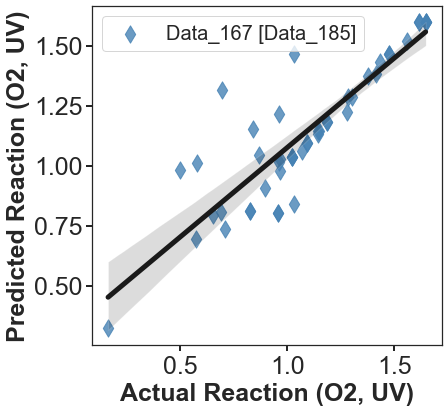

In [17]:
import seaborn as sns
sns.set_theme(style = 'ticks', font_scale = 1.3)
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(6.5, 6))
# Training plots
sns.regplot( x = y_test, y = test_pred, marker = 'd', scatter_kws = {"color": "steelblue","s":150}, line_kws = {'linewidth':5},label = "Data_167 [Data_185]", color = 'k')
plt.ylabel("Predicted Reaction (O2, UV)", fontsize = 25,weight = 'bold')
plt.xlabel("Actual Reaction (O2, UV)", fontsize = 25,weight = 'bold')
plt.legend(loc = 'upper left',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=25, width=2, length=6)
plt.savefig("Regressionplot_167_on_185_testdata.png", dpi = 1000,bbox_inches='tight')
plt.show()

# Saving test data of 167

In [55]:
test_data = pd.DataFrame(X_test)
test_data["Reaction"] = y_test
test_data.to_excel("test_data_167.xlsx")

# Results raw data saving

In [36]:
raw_data = pd.DataFrame(y_train, columns = ["Y_train"])
raw_data["Train_pred"] = train_pred
raw_data.head()

,Y_train,Train_pred
0,1.31731,1.317310
1,0.60200,0.651762
2,1.10900,1.124522
3,0.92100,0.935505
4,0.72400,0.757261


In [37]:
raw_data_test = pd.DataFrame(test_pred, columns = ["Test_pred"])
raw_data_test["Y_test"] = y_test
raw_data_test.head()

,Test_pred,Y_test
0,1.599496,1.64600
1,1.152545,1.13000
2,1.284712,1.30229
3,1.043299,1.01300
4,1.037887,1.02000


In [38]:
raw_data.to_excel('Train_167_results.xlsx')
raw_data_test.to_excel('Test_167_results.xlsx')

# Regression plots

In [ ]:
import seaborn as sns
sns.set_theme(style = 'ticks', font_scale = 1.3)
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(1,2, figsize=(12, 6))
# Training plots
sns.regplot(ax = axes[0], x = y_train, y = train_pred, marker = 'd', scatter_kws = {"color": "steelblue","s":150}, line_kws = {'linewidth':5},label = "Training", color = 'k')
axes[0].set_ylabel("Predicted Reaction (O2, UV)", fontsize = 25,weight = 'bold')
axes[0].set_xlabel("Actual Reaction (O2, UV)", fontsize = 25,weight = 'bold')
axes[0].legend(loc = 'upper left',fontsize=25)
axes[0].tick_params(axis='both', which='major', labelsize=25, width=2, length=6)

sns.regplot(ax = axes[1], x = y_test, y = test_pred, marker = 'd', scatter_kws = {"color": "steelblue","s":150}, line_kws = {'linewidth':5},label = "Testing",color = 'k')
axes[1].set_ylabel("Predicted Reaction (O2, UV)", fontsize = 25,weight = 'bold')
axes[1].set_xlabel("Actual Reaction (O2, UV)", fontsize = 25,weight = 'bold')
axes[1].tick_params(axis='both', which='major', labelsize=25, width=2, length=6)
axes[1].legend(loc = 'upper left',fontsize=25)
plt.savefig("Regressionplot_167.png", dpi = 1000,bbox_inches='tight')
plt.show()

In [ ]:
# Get feature importance values
feature_importance = RF_md.feature_importances_

In [ ]:
# Solute type importance
solute_type = np.mean(feature_importance[0] +feature_importance[1])

# Solvent type importance
sol = 0
for i in range(2,27):
    sol = sol + feature_importance[i]
solvent_type = sol/25

# Adehyde type importance
ald = 0
for i in range(27,36):
    ald = ald + feature_importance[i]
aldehyde_type = ald/9

# Solute volume impotance 
solute_v = feature_importance[36]
solvent_v = feature_importance[37]
aldehyde_v = feature_importance[38]

print("solute_type", ":", solute_type)
print("solvent_type", ":", solvent_type) 
print("aldehyde_type", ":", aldehyde_type) 
print("solute_v", ":", solute_v) 
print("solvent_v", ":", solvent_v)
print("aldehyde_v", ":", aldehyde_v)

# # Features
feature_names = ['Solvent_type','Aldehyde_type','Solvent_V','Aldehyde_V','Solute_type','Solute_V']
importance_scores = [solvent_type,aldehyde_type,solvent_v,aldehyde_v,solute_type,solute_v]


In [ ]:
importance_scores = [solvent_type,aldehyde_type,solvent_v,aldehyde_v,solute_type,solute_v]


In [ ]:
feature_names = ['Solvent_type','Aldehyde_type','Solvent_V','Aldehyde_V','Solute_type','Solute_V']
importance_scores = [solvent_type,aldehyde_type,solvent_v,aldehyde_v,solute_type,solute_v]

# Create a horizontal bar plot
plt.barh(range(len(feature_names)), importance_scores, align='center', color = 'steelblue')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importance Score', fontsize = 25,weight = 'bold')
plt.ylabel('Features', fontsize = 25,weight = 'bold')
plt.savefig("Featureimportance_167.png", dpi = 1000,bbox_inches='tight')
# Display the plot
plt.show()

# Prediction on bad and good ones results

### Bad one analysis

In [ ]:
Bad_data = pd.read_excel("bad_ones.xlsx")
print(Bad_data.shape)
Bad_data.head()

In [ ]:
X = Bad_data[['Solute',
 'Solute_V',
 'Solvent',
 'Solvent_V',
 'Aldehyde',
 'Aldehyde_V']].values

In [ ]:
categorical_features = [0, 2, 4]
X_encoded = onehot_encoder.transform(X[:, categorical_features])
numerical_features = [1, 3, 5]  # Specify the indices of numerical columns
X_processed = np.concatenate((X_encoded, X[:, numerical_features]), axis=1)
predictions = RF_md.predict(X_processed)
predictions = pd.DataFrame(predictions)
predictions.to_excel("reaction.xlsx", index=False)

# Model Saving

In [ ]:
import pickle 
pickle.dump(RF_md, open('reaction_model','wb'))

# Optimization of inputs using Decision tree model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
def fun3bar(X):
    A = int(np.round(X[0]))
    B = X[1]
    C = int(np.round(X[2]))
    D = int(np.round(X[3]))
    E = X[4]
    if D == 8 or E == 0:
        E = 0
        D = 8
    
    G = 200 - B - E # solvent amount
    sol = ['BzOH','a-m-BzOH']
    solvent = ['1-octanol','Benzonitrile','butanone','cyclohexanone','1,2-dichloroethane','chloroform','ethyl acetate',
               'toluene','xylene','cyclohexane','2-hexanone','butyl acetate']
    aldehyde = ['benzaldehyde','acetophenone','p-Tolualdehyde','4-Fluorobenzaldehyde','1-(p-Tolyl)ethanone',
                '1-(4-Fluorophenyl)ethanone','benzophenone','xanthone','x']
    solute_type = sol[A]
    solvent_type = solvent[C] 
    aldehyde_type = aldehyde[D]
    new_data = [solute_type,B,solute_type,G,aldehyde_type,E]  # Replace '...' with your new data
    X = np.array(new_data).reshape(1,6)
    categorical_features = [0, 2, 4]
    X_encoded = onehot_encoder.transform(X[:, categorical_features])
    numerical_features = [1, 3, 5]  # Specify the indices of numerical columns
    X_processed = np.concatenate((X_encoded, X[:, numerical_features]), axis=1)
    predictions = RF_md.predict(X_processed)
    return -predictions
# Make predictions on new data


In [ ]:
import warnings
warnings.filterwarnings("ignore")
lb = [0,20,0,0,0.02]
ub = [1,160,11,7,20] 
pos = list()
N = 50 # Population size
D = 5   # Number of variables
itermax = 100
  # Upper bounds of variables%% Generating the initial population
for i in range(0,N):
   metric = list()
   for j in range(0,D):
      rad = np.random.rand()
      pop = lb[j] + rad*(ub[j] - lb[j])
      metric.append(pop)
   metric = np.array(metric)
   metric = np.reshape(metric,[1,D])
   pos.append(metric)
print("Evaluation start")       
# Evaluate objective function
fx = list()
for i in range(0,N):
   G = pos[i] 
   X = np.reshape(G,[D,1])
   fx_val = fun3bar(X) # compute the objective 
   fx.append(fx_val)
# Intialize gbest
fminvalue = np.min(fx) #Finding Minimum Value
ind = fx.index(fminvalue)
gbest = pos[ind] #Finding corresponding position
# GWO main loop start
iter = 0
Bestfx = list()
BestX = list()
while iter <=itermax-1:
    
    Fgbest = fminvalue #Best value obtained so far
    Best = np.min(fx) #Finding Best Value 
    Bestind = fx.index(Best)
    Xbest = pos[Bestind]
    Worst = np.max(fx) # Finding Worst Value
    Worstind = fx.index(Worst)
    Xworst = pos[Worstind]
    for i in range(0,N):
        X = pos[i]
        pos1 = pos
        rad_num = np.random.rand(1,D)
        Xnew = X + rad_num*(Xbest - Xworst)
       
         # Check the bound
        Xnew = Xnew[0]
        for k in range(0,len(Xnew)):
           
           if Xnew[k] < lb[k]:
              Xnew[k] = lb[k]
           if Xnew[k] > ub[k]:
              Xnew[k] = ub[k] 
        
        fnew = fun3bar(Xnew) #  Compute the function value at Xnew
        Xnew = np.reshape(Xnew,[1,D])
        # Greedy selection
        if fnew<fx[i]:  # Compare the new fitness value with previous
            pos[i] = Xnew #Update position particles
            fx[i] = fnew  #Update function value
        
    # END og for i = N loop
    
    # Update GBEST 
    fmin = np.min(fx)
    find = fx.index(fmin)
    # Compare the best value with previous one
    if fmin<Fgbest: 
        Fgbest = fmin #Update the best function value
        gbest = pos[find] #Update optimal solution
    
    # Memorize the best
    optval = min(fx) # Finding the best one
    optind = fx.index(optval)
    Bestfx.append(optval) 
    BestX.append(pos[optind]) 
    
    # Show iteration information
    print('Iteration ',iter,':','Best Cost = ' ,Bestfx[iter])
    # ("plot")
    # Ploting the Result
    plt.plot(Bestfx)
    plt.xlabel('Iteration Number')
    plt.ylabel('Fitness value')
    plt.title('Convergence vs Iteration')
    iter = iter + 1;
# END while  LOOP

In [ ]:
p1_ = np.array(pos)
f1_ = np.array(fx)
# Sort the output array while maintaining correspondence with the input array
sorted_data = sorted(zip(p1_, f1_), key=lambda x: x[1])
sorted_input, sorted_output = zip(*sorted_data)

# Convert the sorted input and output back to numpy arrays
p1 = np.array(sorted_input)
f1 = np.array(sorted_output)
store_optimize_data = []

for i in range(0,49):
    gbest = p1[i].reshape(1,5)
    Fgbest = f1[i]
    sol = ['BzOH','a-m-BzOH']
    solvent = ['1-octanol','Benzonitrile','butanone','cyclohexanone','1,2-dichloroethane','chloroform','ethyl acetate',
               'toluene','xylene','cyclohexane','2-hexanone','butyl acetate']
    aldehyde = ['benzaldehyde','acetophenone','p-Tolualdehyde','4-Fluorobenzaldehyde','1-(p-Tolyl)ethanone',
                '1-(4-Fluorophenyl)ethanone','benzophenone','xanthone','x']
    solute_type = sol[int(np.round(gbest[:,0]))]
    solute_v =  gbest[:,1][0]
    solvent_type = solvent[int(np.round(gbest[:,2]))] 
    al_type = int(np.round(gbest[:,3]))
    al_v = gbest[:,4]
    if al_type == 8 or al_v == 0:
        al_type = 8
        al_v = 0
    aldehyde_type = aldehyde[al_type] 
    aldehyde_v = al_v
    solvent_v = 200 - solute_v - aldehyde_v
    Reaction = abs(Fgbest)
    ddd = [solute_type,solute_v,solvent_type,solvent_v,aldehyde_type,aldehyde_v,Reaction]
    store_optimize_data.append(ddd)    
    
sss = np.array(store_optimize_data)
sss = pd.DataFrame(sss, columns = [['Solvent_type','solute_v','Solvent_type','Solvent_V','Aldehyde_type','Aldehyde_V','Reaction']])
sss.to_excel("3rd_model_optimized_results.xlsx")


# Random output of the model with random input

In [ ]:
import random
solute_type = ['BzOH','a-m-BzOH']
solute_v = [20,30,40,50,60,70,80,90,100,110,120,130,140,150]
aldehyde_type = ['benzaldehyde','acetophenone','p-Tolualdehyde','4-Fluorobenzaldehyde','1-(p-Tolyl)ethanone',
                '1-(4-Fluorophenyl)ethanone','benzophenone','xanthone','x']
aldehyde_v = [0,0.02,0.2,2,10,20,40]

solvent_type = ['1-octanol','Benzonitrile','butanone','cyclohexanone','1,2-dichloroethane','chloroform','ethyl acetate',
               'toluene','xylene','cyclohexane','2-hexanone','butyl acetate']

stored_rows = []
L = 0 

for _ in range(4000): 
    L += 1 
    print("Iteration:", L)
    row = [random.choice(solute_type), random.choice(solute_v), random.choice(aldehyde_type),
           random.choice(aldehyde_v), random.choice(solvent_type)]

    if row[2] == 'x' or row[3] == 0: 
        row[2] = 'x'
        row[3] = 0 
        
    solvent_v = 200 - row[1] - row[3]
    row.append(solvent_v)
    stored_rows.append(row)

stored_rows = list(set(tuple(row) for row in stored_rows))
stored_rows = [list(row) for row in stored_rows]

In [ ]:
print("-----------------------")
print("Checking for Duplicate Rows:")
duplicates = set()
for i, row in enumerate(stored_rows):
    if row in stored_rows[i + 1:]:
        duplicates.add(tuple(row))

if duplicates:
    print("Duplicate Rows Found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No Duplicate Rows Found.")

In [ ]:
# Convert stored_rows to a pandas DataFrame
df = pd.DataFrame(stored_rows, columns=["Solute_type", "Solute_v", "Aldehyde_type",
                                         "Aldehyde_v", "Solvent_type", "Solvent_v"])

# Save the DataFrame to an Excel file
df.to_excel("randomly_genrated.xlsx", index=False)

# Prediction over data

In [16]:
dataset = pd.read_excel("randomly_genrated_1000,000_old.xlsx")
print(dataset.shape)
dataset.head()

(19152, 6)


,Solute_type,Solute_v,Aldehyde_type,Aldehyde_v,Solvent_type,Solvent_v
0,BzOH,40,benzophenone,2.00,cyclohexane,158.00
1,a-m-BzOH,80,1-(p-Tolyl)ethanone,0.00,chloroform,120.00
2,a-m-BzOH,60,1-(4-Fluorophenyl)ethanone,0.02,2-hexanone,139.98
3,a-m-BzOH,30,xanthone,2.00,butanone,168.00
4,BzOH,100,p-Tolualdehyde,20.00,toluene,80.00


In [ ]:
duplicates = dataset.duplicated()
duplicates

In [ ]:
duplicates_rows = dataset[duplicates]
duplicates_rows

In [17]:
dataset.columns.to_list()

['Solute_type',
 'Solute_v',
 'Aldehyde_type',
 'Aldehyde_v',
 'Solvent_type',
 'Solvent_v']

In [18]:
X = dataset[['Solute_type',
 'Solute_v',
 'Solvent_type',
 'Solvent_v',
 'Aldehyde_type',
 'Aldehyde_v']].values

In [19]:
categorical_features = [0, 2, 4]  # Specify the indices of categorical columns
X_encoded = onehot_encoder.transform(X[:, categorical_features])
numerical_features = [1, 3, 5]  # Specify the indices of numerical columns
X_processed = np.concatenate((X_encoded, X[:, numerical_features]), axis=1)

In [20]:
print(X_processed.shape)

(19152, 39)


In [21]:
predictions = RF_md.predict(X_processed)

In [22]:
predictions = pd.DataFrame(predictions)
predictions.to_excel("reaction.xlsx", index=False)

# Data descing order

In [23]:
dataset = pd.read_excel("randomly_genrated_1000,000_old.xlsx")
print(dataset.shape)
dataset.head()

(19152, 7)


,Solute_type,Solute_v,Aldehyde_type,Aldehyde_v,Solvent_type,Solvent_v,Reaction
0,BzOH,40,benzophenone,2.00,cyclohexane,158.00,1.034333
1,a-m-BzOH,80,1-(p-Tolyl)ethanone,0.00,chloroform,120.00,0.774300
2,a-m-BzOH,60,1-(4-Fluorophenyl)ethanone,0.02,2-hexanone,139.98,0.804379
3,a-m-BzOH,30,xanthone,2.00,butanone,168.00,1.162578
4,BzOH,100,p-Tolualdehyde,20.00,toluene,80.00,0.844067


In [24]:
# Sort the DataFrame in descending order based on the last column
df_sorted = dataset.sort_values(by=dataset.columns[-1], ascending=False)
df_sorted.head()

,Solute_type,Solute_v,Aldehyde_type,Aldehyde_v,Solvent_type,Solvent_v,Reaction
16676,a-m-BzOH,150,benzophenone,2.0,chloroform,48.0,1.599496
5749,BzOH,150,benzophenone,2.0,chloroform,48.0,1.581092
9270,a-m-BzOH,150,benzophenone,10.0,chloroform,40.0,1.538085
17537,BzOH,150,benzophenone,10.0,chloroform,40.0,1.523442
12927,a-m-BzOH,150,benzophenone,2.0,butanone,48.0,1.520935


In [25]:
df_sorted.to_excel("order_randomly_genrated_1000,000_old.xlsx")